In [16]:
from lightgbm import LGBMClassifier

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [18]:
hr = pd.read_csv("/content/drive/MyDrive/Cases/human-resources-analytics/HR_comma_sep.csv")
hr.shape

(14995, 10)

In [19]:
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

In [20]:
l_gbm = LGBMClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
print(l_gbm.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 23, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [21]:
params={'n_estimators':[50,75,100],
        'learning_rate':np.linspace(0.001, 0.7, 5),
        'max_depth':[None, 2, 3, 5]}
gcv = GridSearchCV(l_gbm, param_grid=params, cv=kfold,scoring='neg_log_loss')
gcv.fit(X, y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=LGBMClassifier(random_state=23),
             param_grid={'learning_rate': array([0.001  , 0.17575, 0.3505 , 0.52525, 0.7    ]),
                         'max_depth': [None, 2, 3, 5],
                         'n_estimators': [50, 75, 100]},
             scoring='neg_log_loss')

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

In [ ]:
bm_gbm = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':list(X.columns),
                       'Importance':bm_gbm.feature_importances_})
df_imp = df_imp[df_imp['Importance']>0].sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title("GBM")
plt.show()

### Regression

In [11]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

In [12]:
boston = pd.read_csv("/content/drive/MyDrive/Datasets/Boston.csv")
X = boston.drop('medv', axis=1)
y = boston['medv']

In [ ]:
gbm = LGBMRegressor(random_state=23)
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
params={'n_estimators':[50,75,100],
        'learning_rate':np.linspace(0.001, 0.7, 5),
        'max_depth':[None, 2, 3, 5]}
gcv = GridSearchCV(gbm, param_grid=params, cv=kfold)
gcv.fit(X, y)

In [14]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.3505, 'max_depth': 3, 'n_estimators': 75}
0.8758184375784619


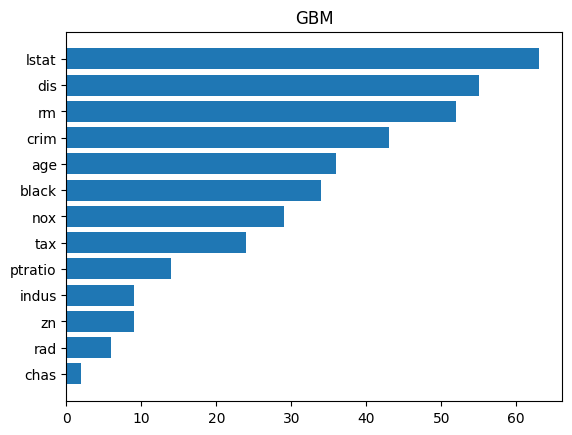

In [15]:
bm_gbm = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':list(X.columns),
                       'Importance':bm_gbm.feature_importances_})
df_imp = df_imp[df_imp['Importance']>0].sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title("GBM")
plt.show()